In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys 
sys.path.append('../src')

In [3]:
from cnn_k4 import *
from cnn import *
from datas import *

In [4]:
bigwig_path = '../data/bws_for_predictor/SPT16_4D_2HdTAG_Sox2_S46_1_120_sorted.bw'
k4_bigwig_path= '../data/bws_for_predictor/SPT16_4D_2HdTAG_K4_S49_150_500_scaled.bw'
fasta_path = '../data/GRCm38.primary_assembly.genome.fa'
chrom = 'chr3'
window_size = 1000
stride = 1000
signal_bins = 200
batch_size = 128
epochs = 100
lr = 1e-3
device = 'mps'
weight_decay = 1e-4
patience=30

In [5]:
dataset = SequenceDualBigWigDataset(
    fasta_path=str(fasta_path),
    k4_bigwig_path=str(k4_bigwig_path),
    target_bigwig_path=str(bigwig_path),
    signal_bins=signal_bins,
    chrom=chrom,
    window_size=window_size,
    stride=stride
)

In [6]:
len(dataset)

80346

In [7]:
# # reduce training data to see if loss hits zero
# dataset.intervals = dataset.intervals[:100]

In [8]:
config = TrainConfig(
    lr=lr,
    weight_decay=weight_decay,
    epochs=epochs,
    patience=patience,
    device=device
)

In [9]:
# import torch
# torch.cuda.empty_cache() 

In [ ]:
model = train_bpnet_k4(
    dataset=dataset,
    batch_size=batch_size,
    config=config,
)

In [ ]:
import torch
import time
from pathlib import Path

date = time.strftime("%Y%m%d_%H")
output_model_path = Path(f'../models_v2/seqk4_bpnet_{date}.pt')

save_model(model, output_model_path)

In [ ]:
# model_path = '../models_v2/seqk4_bpnet_20260128_23.pt'
# model = load_model(model_path, device=device)

In [ ]:
# from torch.utils.data import DataLoader

# loader = DataLoader(
#     dataset,
#     batch_size=1,
#     shuffle=False,
#     num_workers=1
# )


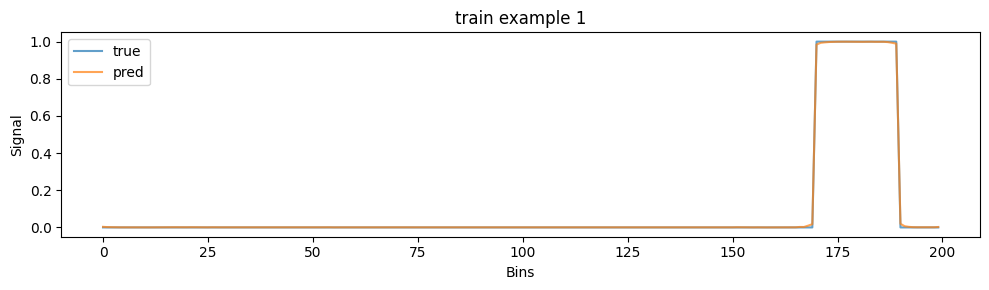

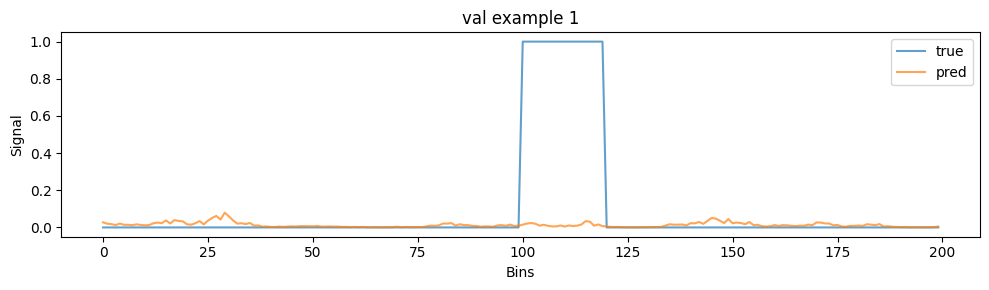

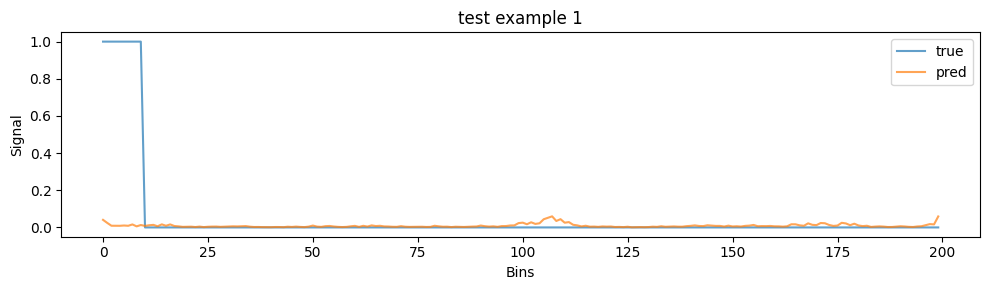

In [ ]:
%matplotlib inline

visualize_split_predictions(
    model,
    device='cpu',
    n_examples_per_split=10,
    # loader=loader
)